<a href="https://colab.research.google.com/github/ajith0208/DSA_Activities_2021/blob/main/Group_1_Week_4_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_excel('Telco-Customer-Churn.xlsx')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


# **1. Compare churn count with respect to gender**

In [82]:
cvg = data[['gender','Churn']]

cvgy = cvg[cvg['Churn']=='Yes']
cvgn = cvg[cvg['Churn']=='No']

fcy = cvgy[cvgy['gender']=='Female']
fcn = cvgn[cvgn['gender']=='Female']

mcy = cvgy[cvgy['gender']=='Male']
mcn = cvgn[cvgn['gender']=='Male']

g_c = {'Gender':['Male','Female'],'Churn yes':[mcy['gender'].count(),fcy['gender'].count()],'Churn no':[mcn['gender'].count(),fcn['gender'].count()]}
gc = pd.DataFrame(g_c)
gc

,Gender,Churn yes,Churn no
0,Male,930,2625
1,Female,939,2549


Text(0.5, 1.0, 'Churn count Vs Gender')

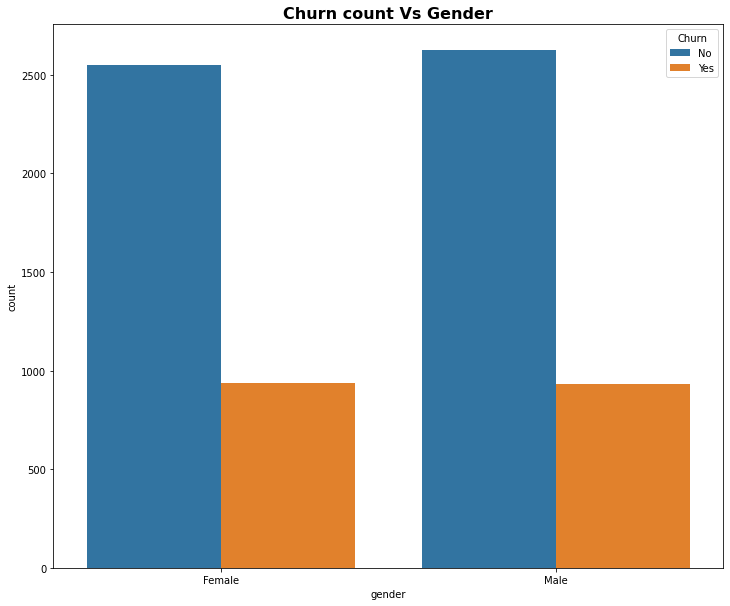

In [94]:
plt.figure(figsize=(12,10))
sns.countplot(x='gender',hue='Churn',data=data)
plt.title('Churn count Vs Gender',fontsize=16,fontweight='bold')

# **2. Findout how many female senior citizen there in the dataset**

In [87]:
sc = data[data['SeniorCitizen']==1]
sc['SeniorCitizen'].count()

1142

In [110]:
scf = sc[sc['gender']=='Female']
scf['gender'].count()

568

In [109]:
scm = sc[sc['gender']=='Male']
scm['gender'].count()

574

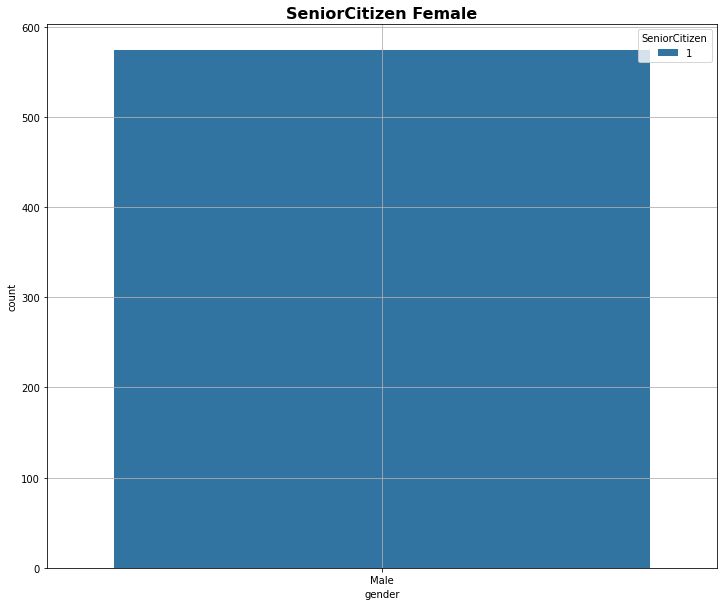

In [112]:
plt.figure(figsize=(12,10))
sns.countplot(x='gender',hue='SeniorCitizen',data=scm)
plt.title('SeniorCitizen Female',fontsize=16,fontweight='bold')
plt.grid(True)

# **3. Compare 'tenure' with 'Total Charges'**

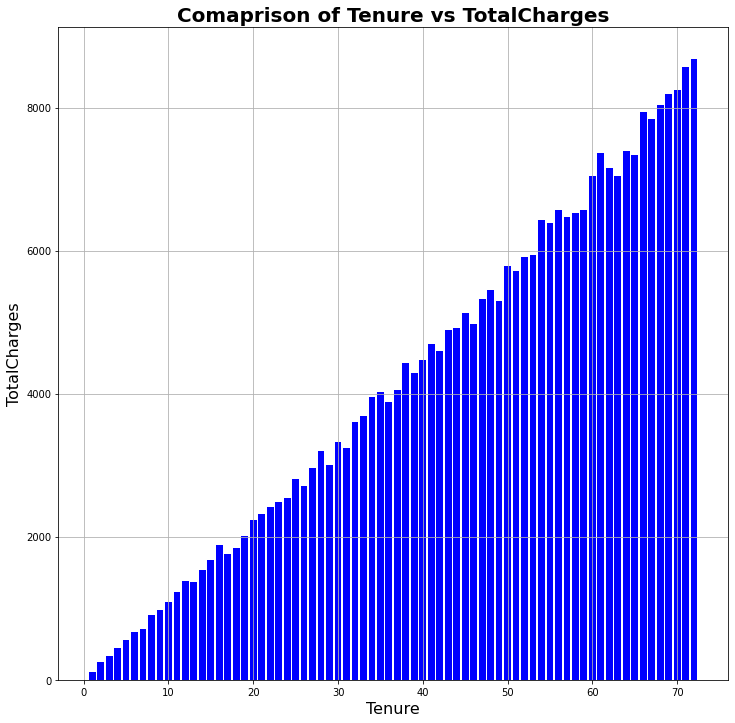

In [136]:
data.drop(data[data['TotalCharges']==' '].index, inplace = True)
data['TotalCharges']= data['TotalCharges'].astype('float')
plt.figure(figsize=(12,12))
plt.bar(data['tenure'],data['TotalCharges'],color='blue')
plt.title('Comaprison of Tenure vs TotalCharges',fontsize=20,fontweight='bold')
plt.xlabel('Tenure',fontsize=16)
plt.ylabel('TotalCharges',fontsize=16)
plt.grid(True)

# **4. Findout which contract preffered by the senior citizen.**

In [146]:
scc = sc['Contract'].value_counts()
scc

Month-to-month    807
One year          190
Two year          145
Name: Contract, dtype: int64

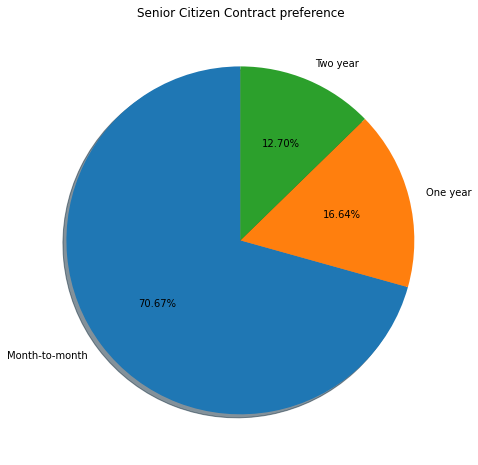

In [147]:
plot = scc.plot.pie(y='SeniorCitizen', figsize=(8, 8),autopct='%1.2f%%',title='Senior Citizen Contract preference',ylabel='',shadow=True, startangle=90)


# **5. Comment your finds on Payment Method?**

In [148]:
dpm = data['PaymentMethod']
dpm

0                Electronic check
1                    Mailed check
2                    Mailed check
3       Bank transfer (automatic)
4                Electronic check
                  ...            
7038                 Mailed check
7039      Credit card (automatic)
7040             Electronic check
7041                 Mailed check
7042    Bank transfer (automatic)
Name: PaymentMethod, Length: 7032, dtype: object

In [149]:
dpm.value_counts()

Electronic check             2365
Mailed check                 1604
Bank transfer (automatic)    1542
Credit card (automatic)      1521
Name: PaymentMethod, dtype: int64

Text(0, 0.5, 'Count')

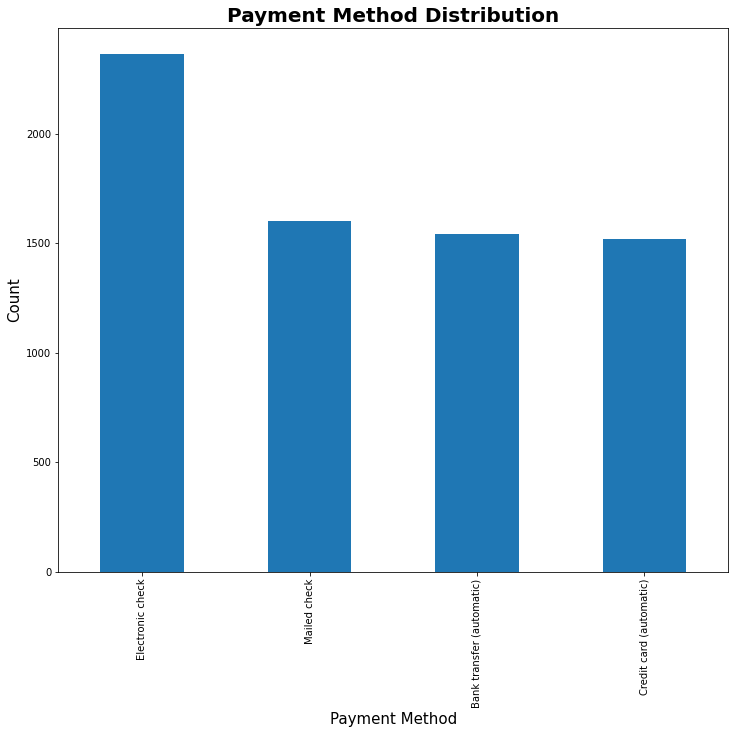

In [151]:
plt.figure(figsize=(12,10))
data['PaymentMethod'].value_counts().plot(kind='bar')
plt.title('Payment Method Distribution',fontsize=20,fontweight='bold')
plt.xlabel('Payment Method',fontsize=15)
plt.ylabel('Count',fontsize=15)

In [152]:
gp = data[['gender','PaymentMethod']]

Text(0, 0.5, 'Count')

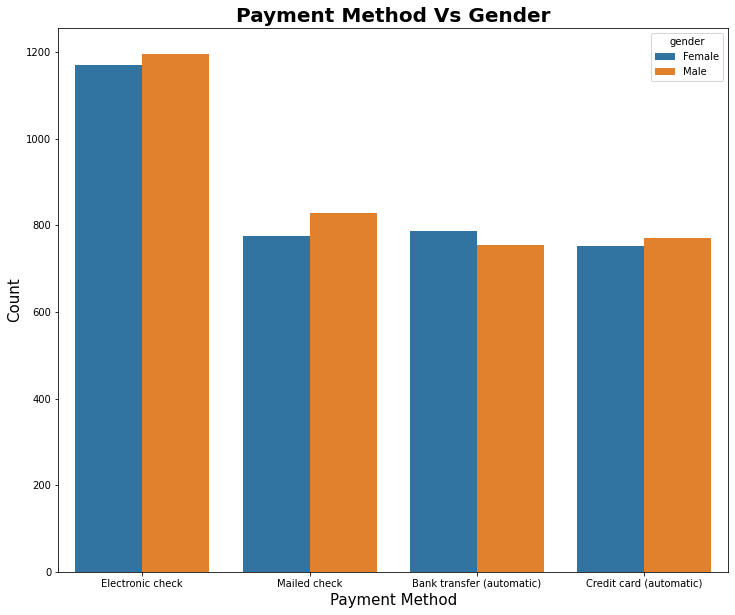

In [156]:
plt.figure(figsize=(12,10))
sns.countplot(x='PaymentMethod',hue='gender',data=gp)
plt.title('Payment Method Vs Gender',fontsize=20,fontweight='bold')
plt.xlabel('Payment Method',fontsize=15)
plt.ylabel('Count',fontsize=15)